## **14. 특징 추출 및 변환**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

# 직접 절대경로로 지정
file = r"C:\Users\zmffk\Downloads\AirQualityUCI_refined.csv"

# 데이터 로딩
df = pd.read_csv(
    file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

# 데이터 확인
print(df.head())

                     CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)  NOx(GT)  \
Datetime                                                           
2004-03-10 18:00:00     2.6       1360.0         1046.0    166.0   
2004-03-10 19:00:00     2.0       1292.0          955.0    103.0   
2004-03-10 20:00:00     2.2       1402.0          939.0    131.0   
2004-03-10 21:00:00     2.2       1376.0          948.0    172.0   
2004-03-10 22:00:00     1.6       1272.0          836.0    131.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    RH  \
Datetime                                                                      
2004-03-10 18:00:00        1056.0    113.0        1692.0       1268.0  48.9   
2004-03-10 19:00:00        1174.0     92.0        1559.0        972.0  47.7   
2004-03-10 20:00:00        1140.0    114.0        1555.0       1074.0  54.0   
2004-03-10 21:00:00        1092.0    122.0        1584.0       1203.0  60.0   
2004-03-10 22:00:00        1205.0    116.0       

C:\Users\zmffk\AppData\Local\Temp\ipykernel_80676\1910479090.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


In [26]:
# [+] 일산화탄소 변수 결측 데이터 처리
co =  pd.Series([1.0, np.nan, 3.0, np.nan, 5.0])  # 복사본 생성
co_copy = co.copy()
co_interp = co_copy.interpolate(method='linear') # 선형 보간

### **구간화**(binning)

In [27]:
# [+] 최대값, 최소값
max_val = max(co)
min_val = min(co)

print(max_val, min_val)

5.0 1.0


In [43]:
# [+] 구간 별 기준 값 집합 생성
bins = [0, 2.38, 4.76, 7.14, 9.52, 11.9]
bins

[0, 2.38, 4.76, 7.14, 9.52, 11.9]

In [44]:
# 구간에 대한 레이블 집합
labels=['0 <=x<2.38', '2.38<=x<4.76', '4.76<=x<7.14',
       '7.14<=x<9.52', '9.52<=x<11.9']

In [45]:
# 일산화탄소 변수(수치형)에 대한 범주형 변수 생성
df['bins'] = pd.cut(
    co, 
    bins=bins, 
    labels=labels, 
    include_lowest=True # 첫 번째 구간의 왼쪽 경계값을 포함할지 여부
)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CO(GT)         7765 non-null   float64 
 1   PT08.S1(CO)    8991 non-null   float64 
 2   PT08.S2(NMHC)  8991 non-null   float64 
 3   NOx(GT)        7718 non-null   float64 
 4   PT08.S3(NOx)   8991 non-null   float64 
 5   NO2(GT)        7715 non-null   float64 
 6   PT08.S4(NO2)   8991 non-null   float64 
 7   PT08.S5(O3)    8991 non-null   float64 
 8   RH             8991 non-null   float64 
 9   AH             8991 non-null   float64 
 10  C6H6(GT)       9357 non-null   float64 
 11  log            8991 non-null   float64 
 12  bins           0 non-null      category
dtypes: category(1), float64(12)
memory usage: 959.7 KB


In [46]:
# bins 변수 출력
df['bins']

Datetime
2004-03-10 18:00:00    NaN
2004-03-10 19:00:00    NaN
2004-03-10 20:00:00    NaN
2004-03-10 21:00:00    NaN
2004-03-10 22:00:00    NaN
                      ... 
2005-04-04 10:00:00    NaN
2005-04-04 11:00:00    NaN
2005-04-04 12:00:00    NaN
2005-04-04 13:00:00    NaN
2005-04-04 14:00:00    NaN
Name: bins, Length: 9357, dtype: category
Categories (5, object): ['0 <=x<2.38' < '2.38<=x<4.76' < '4.76<=x<7.14' < '7.14<=x<9.52' < '9.52<=x<11.9']

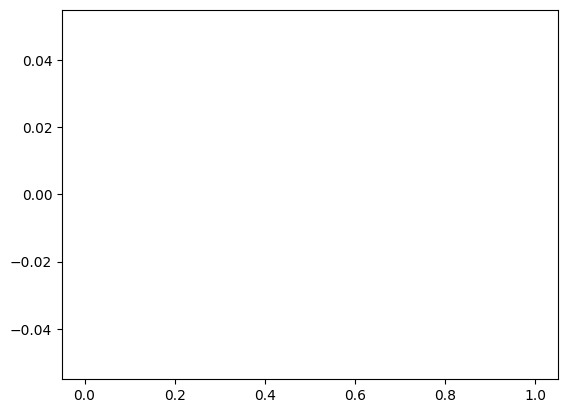

In [54]:
# bins 변수의 히스토그램 시각화
plt.hist(sorted(df['bins'].dropna()), bins=len(bins)-1)
plt.show()

### **로그 변환**(log transformation)

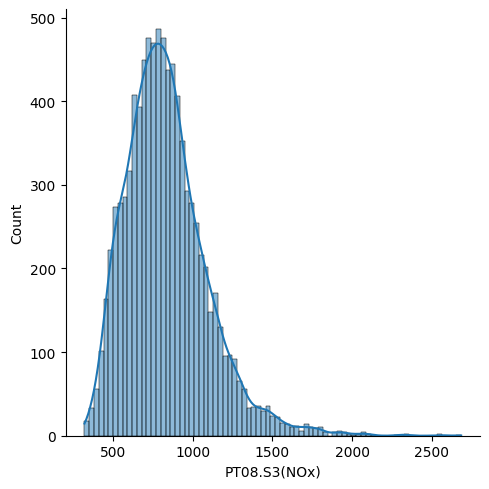

In [49]:
# 질소 산화물 분포 시각화
sns.displot(df['PT08.S3(NOx)'], kde=True)

In [50]:
# [+] 로그 스케일로 변환: Common logarithm(log10)
df['log'] =  np.log10(df['PT08.S3(NOx)'])

In [51]:
# 변환된 변수 출력
df['log']

Datetime
2004-03-10 18:00:00    3.023664
2004-03-10 19:00:00    3.069668
2004-03-10 20:00:00    3.056905
2004-03-10 21:00:00    3.038223
2004-03-10 22:00:00    3.080987
                         ...   
2005-04-04 10:00:00    2.731589
2005-04-04 11:00:00    2.781037
2005-04-04 12:00:00    2.780317
2005-04-04 13:00:00    2.846337
2005-04-04 14:00:00    2.815578
Name: log, Length: 9357, dtype: float64

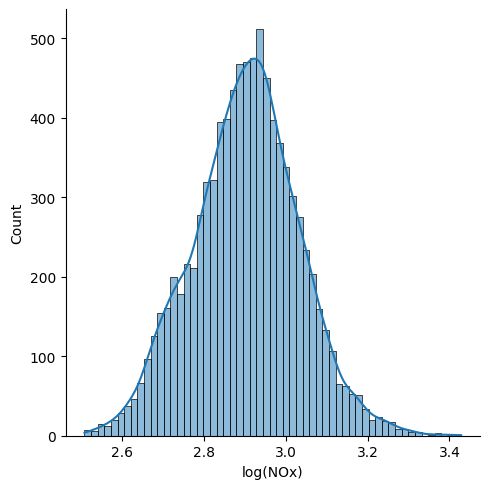

In [52]:
# 변환된 변수의 분포 시각화
sns.displot(df['log'], kde=True)
plt.xlabel('log(NOx)')
plt.show()

### **원핫인코딩**(one-hot encoding)

In [56]:
# 예제 데이터: 인사 평가

emp_id = pd.Series([1, 2, 3, 4, 5])
gender = pd.Series(['Male', 'Female', 'Female', 'Male', 'Female'])
remarks = pd.Series(['Nice', 'Good', 'Great', 'Great', 'Nice'])

df_emp = pd.DataFrame()
df_emp['emp_id'] = emp_id
df_emp['gender'] = gender
df_emp['remarks'] = remarks

df_emp

,emp_id,gender,remarks
0,1,Male,Nice
1,2,Female,Good
2,3,Female,Great
3,4,Male,Great
4,5,Female,Nice


In [58]:
# [+] 범주형 변수 별(gender, remarks) Unique value 리스트 출력
print("gender 값 분포:\n", df_emp['gender'].value_counts())
print("\nremarks 값 분포:\n", df_emp['remarks'].value_counts())

gender 값 분포:
 gender
Female    3
Male      2
Name: count, dtype: int64

remarks 값 분포:
 remarks
Nice     2
Great    2
Good     1
Name: count, dtype: int64


In [20]:
# [+] 원핫인코딩 적용: 범주형 변수 -> 이진값 벡터
df_emp_encoded = pd.get_dummies(df_emp, columns=['gender', 'remarks'])
df_emp_encoded

,emp_id,gender_Female,gender_Male,remarks_Good,remarks_Great,remarks_Nice
0,1,False,True,False,False,True
1,2,True,False,True,False,False
2,3,True,False,False,True,False
3,4,False,True,False,True,False
4,5,True,False,False,False,True


### **정규화**(normalization)

In [60]:
# [+] 비메탄탄화수소 변수 결측 데이터 처리
nmhc = pd.Series([0.5, None, 0.7, None, 0.9, 1.2])  # Non-methane hydrocarbon (결측치 포함)

# 결측치 처리: 선형 보간
nmhc_filled = nmhc.interpolate(method='linear')

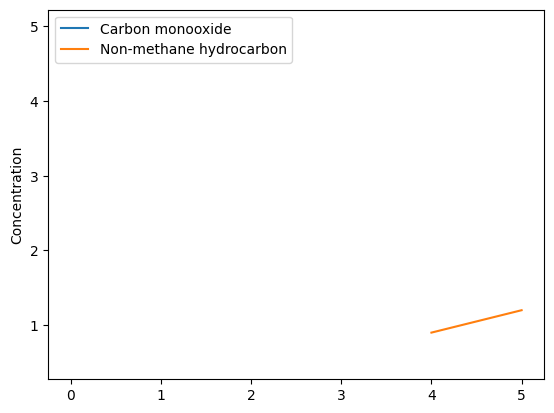

In [61]:
# 스케일이 서로 다른 두 변수 시각화
plt.plot(co, label='Carbon monooxide')
plt.plot(nmhc, label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

In [64]:
# [+] 일산화탄소 변수 정규화
co_max = co.max()  # 최댓값 계산 (함수 호출 X)
co_min = co.min()  # 최솟값 계산 (함수 호출 X)

# 최소-최대 정규화
df['CO_Norm'] = (co - co_min) / (co_max - co_min)
df['CO_Norm']

Datetime
2004-03-10 18:00:00   NaN
2004-03-10 19:00:00   NaN
2004-03-10 20:00:00   NaN
2004-03-10 21:00:00   NaN
2004-03-10 22:00:00   NaN
                       ..
2005-04-04 10:00:00   NaN
2005-04-04 11:00:00   NaN
2005-04-04 12:00:00   NaN
2005-04-04 13:00:00   NaN
2005-04-04 14:00:00   NaN
Name: CO_Norm, Length: 9357, dtype: float64

In [67]:
# [+] 비메탄탄화수소 변수 정규화
nmhc_max = nmhc.max()
nmhc_min = nmhc.min()

df['NMHC_Norm'] =  (nmhc - nmhc_min) / (nmhc_max - nmhc_min)
df['NMHC_Norm']

Datetime
2004-03-10 18:00:00   NaN
2004-03-10 19:00:00   NaN
2004-03-10 20:00:00   NaN
2004-03-10 21:00:00   NaN
2004-03-10 22:00:00   NaN
                       ..
2005-04-04 10:00:00   NaN
2005-04-04 11:00:00   NaN
2005-04-04 12:00:00   NaN
2005-04-04 13:00:00   NaN
2005-04-04 14:00:00   NaN
Name: NMHC_Norm, Length: 9357, dtype: float64

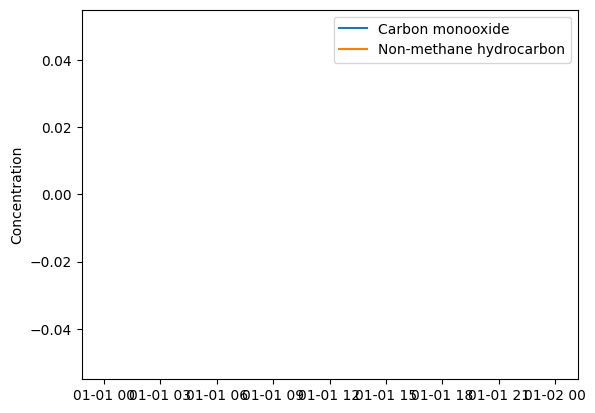

In [68]:
# 정규화된 두 변수 시각화
plt.plot(df['CO_Norm'], label='Carbon monooxide')
plt.plot(df['NMHC_Norm'], label='Non-methane hydrocarbon')
plt.ylabel('Concentration')
plt.legend(loc='best')

### **특징 분할**

In [8]:
# 예제: 영화 데이터
movies = pd.Series(["The Godfather, 1972, Francis Ford Coppola",
                    "Contact, 1997, Robert Zemeckis",
                   "Parasite, 2019, Joon-ho Bong"])

movies

0    The Godfather, 1972, Francis Ford Coppola
1               Contact, 1997, Robert Zemeckis
2                 Parasite, 2019, Joon-ho Bong
dtype: object

In [9]:
# 영화 데이터의 값 부
# Divide movie data into title, year, director columns
lst_title = []
lst_year = []
lst_director = []

for val in movies:
    title, year, director = val.split(',')  # data split
    lst_title.append(title)
    lst_year.append(year)
    lst_director.append(director)

print(lst_title)
print(lst_year)
print(lst_director)

['The Godfather', 'Contact', 'Parasite']
[' 1972', ' 1997', ' 2019']
[' Francis Ford Coppola', ' Robert Zemeckis', ' Joon-ho Bong']


In [10]:
# Make a DataFrame object
df_movie = pd.DataFrame()
df_movie['title'] = lst_title
df_movie['year'] = lst_year
df_movie['director'] = lst_director

df_movie

,title,year,director
0,The Godfather,1972,Francis Ford Coppola
1,Contact,1997,Robert Zemeckis
2,Parasite,2019,Joon-ho Bong
